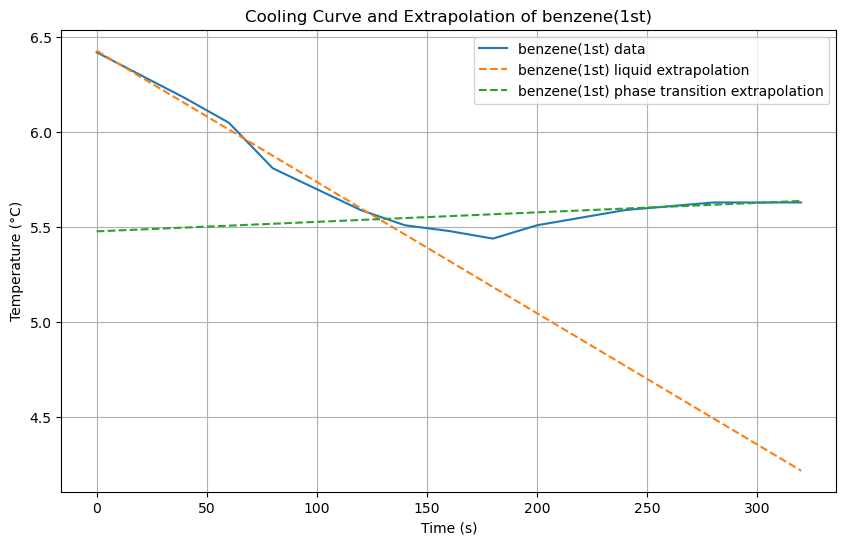

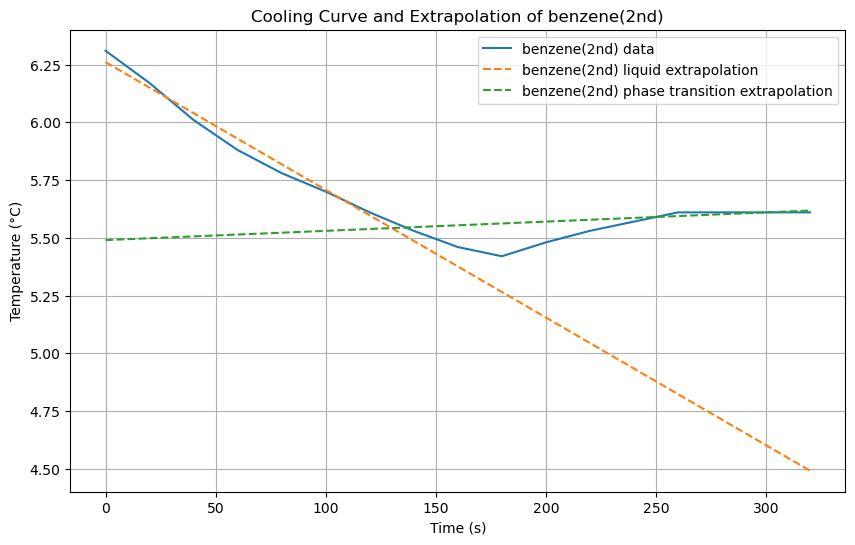

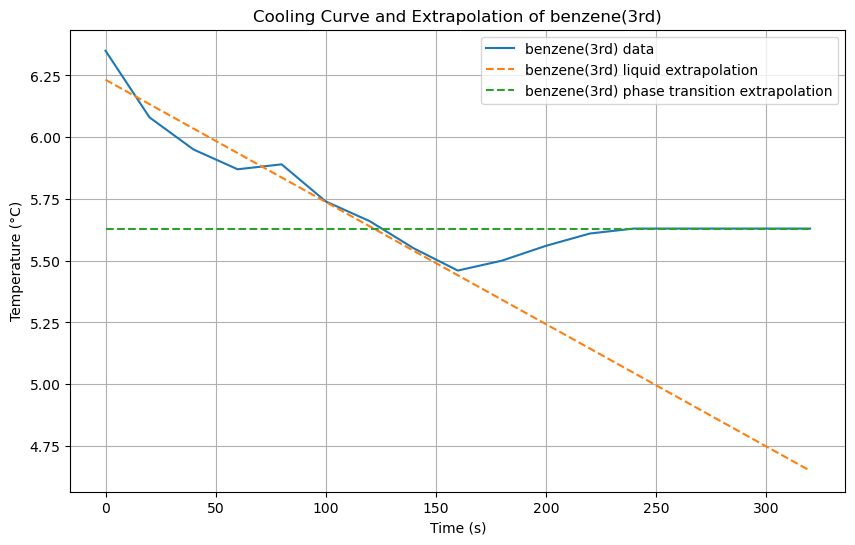

{'benzene(1st)': 5.54217041800643,
 'benzene(2nd)': 5.541997590845211,
 'benzene(3rd)': 5.63}

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data = {
    "time (s)": [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320],
    "benzene(1st)": [6.42, 6.30, 6.18, 6.05, 5.81, 5.70, 5.59, 5.51, 5.48, 5.44, 5.51, 5.55, 5.59, 5.61, 5.63, 5.63, 5.63],
    "benzene(2nd)": [6.31, 6.17, 6.01, 5.88, 5.78, 5.70, 5.61, 5.53, 5.46, 5.42, 5.48, 5.53, 5.57, 5.61, 5.61, 5.61, None],
    "benzene(3rd)": [6.35, 6.08, 5.95, 5.87, 5.89, 5.74, 5.66, 5.55, 5.46, 5.50, 5.56, 5.61, 5.63, 5.63, 5.63, None, None]
}

df = pd.DataFrame(data)

df.interpolate(inplace=True)

def linear_extrapolation(time, temp):
    model = LinearRegression()
    model.fit(time.reshape(-1, 1), temp)
    return model

# 액체 상태와 상전이 상태 데이터 구분 
liquid_phase_data = df[df['time (s)'] <= 140]
phase_transition_data = df[(df['time (s)'] >= 240) & (df['time (s)'] <= 320)]

freezing_points = {}

for column in ['benzene(1st)', 'benzene(2nd)', 'benzene(3rd)']:
    liquid_model = linear_extrapolation(liquid_phase_data['time (s)'].values, liquid_phase_data[column].values)
    transition_model = linear_extrapolation(phase_transition_data['time (s)'].values, phase_transition_data[column].values)
    
    # 외삽을 통한 교차점 (어는점) 찾기.
    A = liquid_model.coef_[0]
    B = transition_model.coef_[0]
    C = liquid_model.intercept_
    D = transition_model.intercept_
    
    freezing_point_time = (D - C) / (A - B)
    freezing_point_temp = liquid_model.predict(np.array([[freezing_point_time]]))  # np.array로 변경
    
    freezing_points[column] = freezing_point_temp[0]

for column in ['benzene(1st)', 'benzene(2nd)', 'benzene(3rd)']:
    plt.figure(figsize=(10, 6))
    plt.plot(df['time (s)'], df[column], label=f'{column} data')
    plt.plot(df['time (s)'], linear_extrapolation(liquid_phase_data['time (s)'].values, liquid_phase_data[column].values).predict(df[['time (s)']].values), label=f'{column} liquid extrapolation', linestyle='--')
    plt.plot(df['time (s)'], linear_extrapolation(phase_transition_data['time (s)'].values, phase_transition_data[column].values).predict(df[['time (s)']].values), label=f'{column} phase transition extrapolation', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Cooling Curve and Extrapolation of {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

freezing_points

